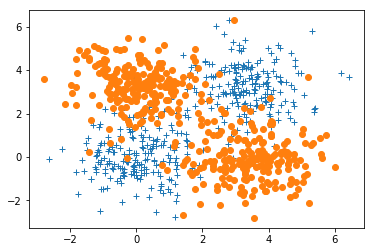

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
import tqdm

%matplotlib inline

# Creation of data
size_data = 200
spacing = 3.3
data_A = np.concatenate([
        np.array([norm.rvs(size=size_data),norm.rvs(size=size_data)]).T,
        np.array([norm.rvs(size=size_data),norm.rvs(size=size_data)]).T + np.array([spacing,spacing])
        ])
        
data_B = np.concatenate([
        np.array([norm.rvs(size=size_data),norm.rvs(size=size_data)]).T + np.array([spacing, 0]),
        np.array([norm.rvs(size=size_data),norm.rvs(size=size_data)]).T + np.array([0,spacing])
        ])

plt.figure()
plt.plot(data_A[:,0],data_A[:,1], '+')
plt.plot(data_B[:,0],data_B[:,1], 'o')


100%|██████████| 29/29 [00:05<00:00,  5.01it/s]


Text(0,0.5,'accuracy %')

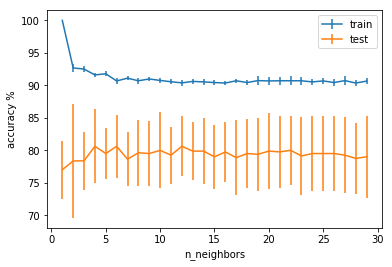

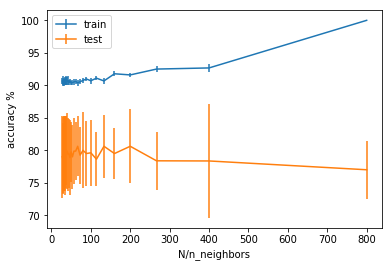

In [2]:
X = np.concatenate([data_A,data_B])
y = np.concatenate([np.zeros(size_data*2),np.ones(size_data*2)])

n_splits = 6
kf = KFold(n_splits=n_splits)

n_neighbors = np.arange(1,30).astype(int)

results_train = np.empty((n_neighbors.size,n_splits))
results_test = np.empty((n_neighbors.size,n_splits))


for i_neigh in tqdm.tqdm(range(n_neighbors.size)):
    i_split=0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
         
        classifier = KNeighborsClassifier(n_neighbors=n_neighbors[i_neigh])
        classifier.fit(X_train,y_train)
        results_train[i_neigh,i_split] = (classifier.predict(X_train) == y_train).mean()*100
        results_test[i_neigh,i_split] = (classifier.predict(X_test) == y_test).mean()*100
        i_split+=1


plt.figure()
plt.errorbar(n_neighbors,results_train.mean(axis=1),yerr=results_train.std(axis=1),label='train')
plt.errorbar(n_neighbors,results_test.mean(axis=1),yerr=results_test.std(axis=1),label='test')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('accuracy %')


plt.figure()
plt.errorbar(size_data*4/n_neighbors,results_train.mean(axis=1),yerr=results_train.std(axis=1),label='train')
plt.errorbar(size_data*4/n_neighbors,results_test.mean(axis=1),yerr=results_test.std(axis=1),label='test')
plt.legend()
plt.xlabel('N/n_neighbors')
plt.ylabel('accuracy %')


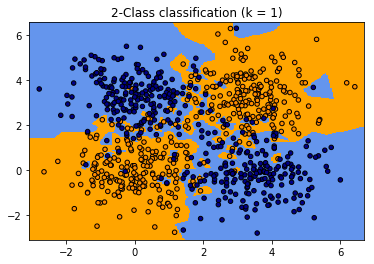

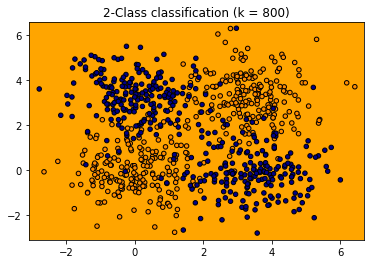

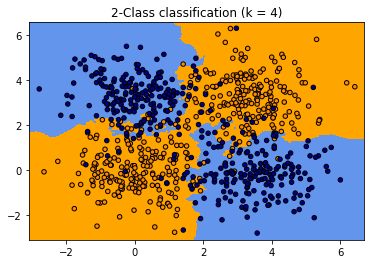

In [3]:
def plot_knn(X,y,n_neigh):
    
    clf = KNeighborsClassifier(n_neighbors=n_neigh)
    clf.fit(X,y)

    h = .04  # step size in the mesh
    
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)"
              % (n_neigh))
    

    
plot_knn(X,y,1)
plot_knn(X,y,size_data*4)
plot_knn(X,y,n_neighbors[np.argmax(results_test.mean(axis=1))])